## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Q1.1 Regression predicts a continuous numerical value, while classification predicts a discrete category or class label.

Q1.2 A confusion table compares predicted labels to actual labels. It reveals true positives, false positives, true negatives, and false negatives, and helps people see the overall accuracy and performance of the model.

Q1.3 SSE measures the total squared difference between predicted and actual values. A smaller SSE means predictions are closer to the true data points. It is a gauge of model fit in regression.

Q1.4 Overfitting is when the model is too complex to reliably explain the phenomenon; it has great training accuracy but poor test performance. Underfiting occurs when the model is too simple to reliably explain the phenomenon; it has poor accuracy on training and test sets.

Q1.5 Splitting data training and testing sets enables training on one portion and evaluate on unseen data, and gives a realistic estimate of performance. Chooing k by evaluating accuracy or SSE on the test set helps pick a k that balances bias and variance, and improve generalization.

Q1.6 Predicting a single class label is simple to interpret and good for decisive tasks; the weakness is that it hides uncertainty. Predicting a probability distribution shows how confident the model is in each class and enables threshold tuning or risk-aware decisions; the weakness is that it requires calibration and careful interpretation.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [10]:
## Q2.1 Load dataset and clean data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv('/content/USA_cars_datasets.csv')
# Keep only required columns
cols_keep = ["price", "year", "mileage"]
df = df[cols_keep].copy()

# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Show the dimensions of the dataset
print("\nDataset dimensions (rows, columns):")
print(df.shape)

# Display the first 10 rows of data
print("\nHead:")
print(df.head(10))

Missing values in each column:
price      0
year       0
mileage    0
dtype: int64

Dataset dimensions (rows, columns):
(2499, 3)

Head:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
5   5700  2018    45561
6   7300  2010   149050
7  13350  2017    23525
8  14600  2018     9371
9   5250  2017    63418


There is no NA to handle. The head are price, year, mileage, which are printed above. The dimensions of data are 2499 rows, 3 columns.

In [11]:
## Q2.2 Maxmin normalize year and mileage
# Min-Max normalization
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

# Display the first 5 rows of normalized data
print("First 5 rows after normalization:")
print(df.head())

First 5 rows after normalization:
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [12]:
## Q2.3 Split the sample into ~80% for training and ~20% for evaluation
X = df[['year', 'mileage']]  # predictors
y = df['price']              # target

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show the size of each split
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 1999
Test set size: 500


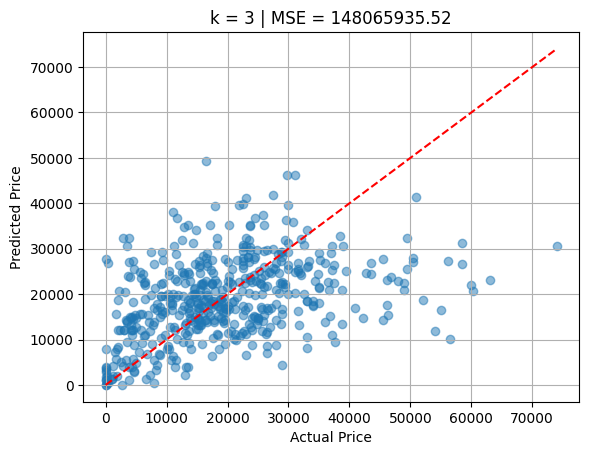

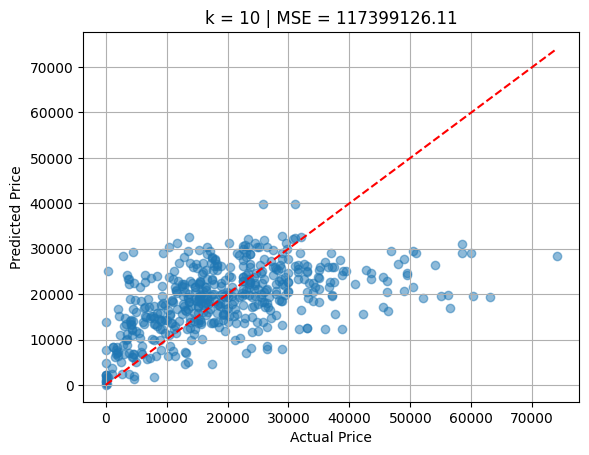

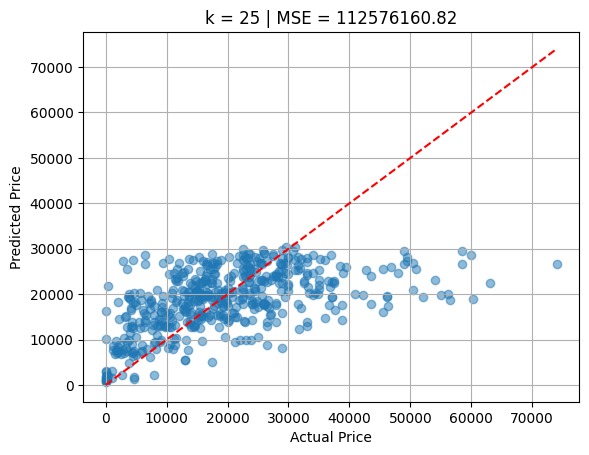

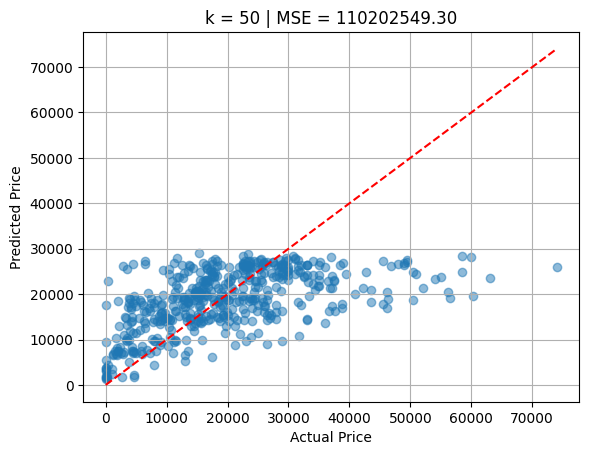

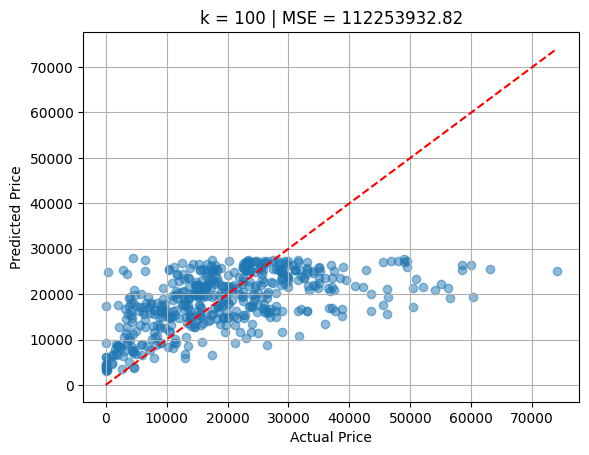

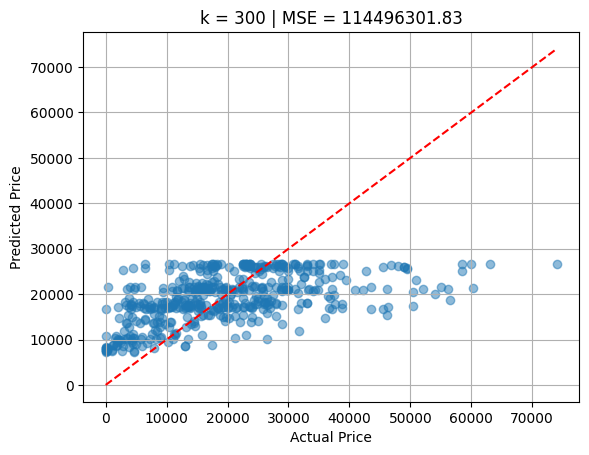


Mean Squared Error for different k values:
k = 3: MSE = 148065935.52
k = 10: MSE = 117399126.11
k = 25: MSE = 112576160.82
k = 50: MSE = 110202549.30
k = 100: MSE = 112253932.82
k = 300: MSE = 114496301.83


In [13]:
## Q2.4 Predict price using year and mileage
# Compute the mean squared error and print a scatterplot
k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((k, mse))


    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k} | MSE = {mse:.2f}")
    plt.grid(True)
    plt.show()

print("\nMean Squared Error for different k values:")
for k, mse in mse_results:
    print(f"k = {k}: MSE = {mse:.2f}")

As k increases from 3 to 50, the scatterplots tighten around the diagonal and the mean squared error falls from about 148 million to about 110 million. This means the model fits better. When k goes past 50, the error starts to rise again and predictions bunch around the average price, showing underfitting. In every plot the model still tends to guess too low for expensive cars and too high for cheap ones, so around k=50 gives the best balance.

In [14]:
## Q2.5 Determine the optimal k for these data
optimal_k, min_mse = min(mse_results, key=lambda x: x[1])
print(f"Optimal k = {optimal_k} with MSE = {min_mse:.2f}")

Optimal k = 50 with MSE = 110202549.30


In [ ]:
## Q2.6 Describe what happened in the plots of predicted versus actual prices as k varied

When k=3, the predictions follow only a few neighbors, so they jump around a lot and the test error is high, which is overfitting.

As k rises to about 50, the points line up closer to the 45-degree line and the mean squared error drops to about 110 million, giving the best fit.

When k goes higher (to 100 and 300), the predictions get too smooth and move toward the overall average price, so the error starts to rise again, which is underfitting.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.